In [79]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS

pd.options.display.max_columns = 500

pd.options.display.max_rows = 5000

In [80]:
os.getcwd()
os.chdir('c:\\Users\\zach_\\Desktop\\Research\\Github\\RFE_project')
pd.set_option('display.max_columns', 500)


In [22]:
datapath = Path("data/cleaned/agg_pattern.csv")
df = pd.read_csv(datapath)

In [23]:
df['sector_2'].unique()

array([11, 21, 22, 23, 31, 42, 44, 48, 51, 52, 53, 54, 55, 56, 61, 62, 71,
       72, 81], dtype=int64)

In [24]:
df.head()

,Unnamed: 0,sector_2,year,death,firms,emp,estabs,estabs_entry,estabs_exit,job_creation,job_destruction,net_job_creation,denom,industry_restrictions_1_0,industry_restrictions_2_0,gdp,entry_whole,incumbents_whole,entry_rate_whole,death_rate_whole,estabs_entry_rate,estabs_exit_rate,job_creation_rate,job_destruction_rate,net_job_creation_rate
0,0,11,1978,2876.0,23763.0,200156.0,24429.0,4717.0,3975.0,61733.0,46315.0,15418.0,192327.0,30389.643300,33089.153310,59.5,3911.0,19852.0,0.164584,0.121028,0.193090,0.162716,0.320979,0.240814,0.080166
1,1,21,1978,1702.0,19207.0,699663.0,24368.0,4055.0,3207.0,170491.0,170969.0,-478.0,700124.0,7175.036180,7795.853877,50.4,2686.0,16521.0,0.139845,0.088614,0.166407,0.131607,0.243515,0.244198,-0.000683
2,2,22,1978,215.0,5773.0,659256.0,11813.0,940.0,620.0,82488.0,51544.0,30944.0,643614.0,9810.693309,10526.348410,52.0,429.0,5344.0,0.074311,0.037242,0.079573,0.052485,0.128164,0.080085,0.048079
3,3,23,1978,43838.0,426390.0,4076989.0,430735.0,91575.0,56824.0,1345453.0,782310.0,563143.0,3797639.0,NaN,NaN,109.9,80971.0,345419.0,0.189899,0.102812,0.212602,0.131923,0.354287,0.205999,0.148288
4,4,31,1978,19132.0,275205.0,18119581.0,309473.0,34974.0,28249.0,2563601.0,1699502.0,864099.0,17687054.0,60488.412950,69323.845120,508.7,27516.0,247689.0,0.099984,0.069519,0.113011,0.091281,0.144942,0.096087,0.048855


In [25]:
df_finance = df[df.sector_2 == 51]
print(df_finance.columns)

Index(['Unnamed: 0', 'sector_2', 'year', 'death', 'firms', 'emp', 'estabs',
       'estabs_entry', 'estabs_exit', 'job_creation', 'job_destruction',
       'net_job_creation', 'denom', 'industry_restrictions_1_0',
       'industry_restrictions_2_0', 'gdp', 'entry_whole', 'incumbents_whole',
       'entry_rate_whole', 'death_rate_whole', 'estabs_entry_rate',
       'estabs_exit_rate', 'job_creation_rate', 'job_destruction_rate',
       'net_job_creation_rate'],
      dtype='object')


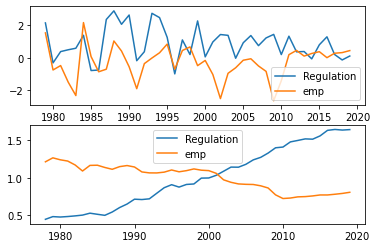

In [27]:
df_sector = df[df.sector_2 == 31]
var = "emp"
x = df_sector.year
y1 = np.log(df_sector.industry_restrictions_2_0) - np.log(df_sector.industry_restrictions_2_0.shift(+1))
y1_normalized = y1/y1.std()
y1_long = (df_sector.industry_restrictions_2_0)
y1_long_normalized = y1_long/y1_long.mean()

y2 = (df_sector[var] - df_sector[var].shift(1))
y2_normalized = y2/y2.std()
y2_long = (df_sector[var])
y2_long_normalized = y2_long/y2_long.mean()

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(x, y1_normalized, label='Regulation')
ax1.plot(x, y2_normalized, label=var)
ax1.legend()

ax2.plot(x, y1_long_normalized, label='Regulation')
ax2.plot(x, y2_long_normalized, label=var)
ax2.legend()

In [81]:
datapath = Path("data/cleaned/life_path_sec_ag.csv")
df = pd.read_csv(datapath)

In [66]:
print(df.columns.tolist())

['Unnamed: 0', 'year', 'sector', 'age_coarse', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry', 'estabs_exit', 'job_creation', 'job_destruction', 'net_job_creation', 'firmdeath_firms', 'estabs_entry_rate', 'estabs_exit_rate', 'job_creation_rate', 'job_destruction_rate', 'net_job_creation_rate', 'reallocation_rate', 'death', 'log_emp', 'log_avg_emp', 'death_rate', 'sector_2', 'sector_3', 'sector_4', 'L_1_emp', 'L_1_firms', 'L_1_death_rate', 'L_2_emp', 'L_2_firms', 'L_2_death_rate', 'L_3_emp', 'L_3_firms', 'L_3_death_rate', 'L_4_emp', 'L_4_firms', 'L_4_death_rate', 'L_5_emp', 'L_5_firms', 'L_5_death_rate', 'L_6_emp', 'L_6_firms', 'L_6_death_rate', 'L_0_emp', 'L_0_firms', 'age_grp_dummy', 'L_0_year', 'L_0_industry_restrictions_1_0', 'L_0_industry_restrictions_2_0', 'L_0_gdp', 'L_0_entry_whole', 'L_0_incumbents_whole', 'L_0_log_restriction_1_0', 'L_0_log_restriction_2_0', 'L_0_log_gdp', 'L_0_log_emp', 'L_0_entry_rate_whole', 'L_1_year', 'L_1_industry_restrictions_1_0', 'L_1_industry_rest

In [93]:
depend_var = "death_rate"
temp_dict = []
for age in df.age_coarse.unique()[1:]:
    
    # load data
    data = df[df.age_coarse == age]

    # sample restriction
    data = data[data.year > 1985]

    # regression
    data = data.set_index(['sector', 'year'])

    # regression
    data1 = data.loc[:, ["L_0_log_restriction_2_0", "L_1_log_restriction_2_0", "L_0_chg_restriction_2_0",
                        "L_0_entry_rate_whole", "L_1_entry_rate_whole", "L_2_entry_rate_whole", "L_3_entry_rate_whole", "L_4_entry_rate_whole",
                        "L_0_log_gdp", "L_1_log_gdp", "L_2_log_gdp", "L_3_log_gdp", "L_4_log_gdp", "L_1_death_rate",
                        "death_rate", "emp",
                        'sector_2', depend_var, 'firms']].dropna()
    mod1 = PanelOLS.from_formula(formula = f'{depend_var} ~ \
                                            + L_0_entry_rate_whole + L_1_entry_rate_whole   \
                                            + L_0_log_gdp + L_1_log_gdp   \
                                            + L_0_log_restriction_2_0 + EntityEffects + TimeEffects',
                                            weights=data1['firms'], data = data1, drop_absorbed=True)

    res = mod1.fit(cov_type='heteroskedastic')

    # results
    vnames = ["L_0_log_restriction_2_0"]
    for v_name in vnames:
        dict1 = {}
        coefs_value = res.params[v_name]
        std = res.std_errors[v_name]
        lower_ci = res.conf_int().loc[v_name, "lower"]
        upper_ci = res.conf_int().loc[v_name, "upper"]
        p_value = res.pvalues[v_name]
        nobs = res.nobs
        sign = (lower_ci * upper_ci > 0)
        dict1.update({"name": v_name, "age": age, "Coef": coefs_value,
                      "std":std,
                        "lower_ci": lower_ci, "upper_ci": upper_ci,
                        "p values":p_value, "significance": sign,
                        "# obs":nobs}) 
        temp_dict.append(dict1)

In [148]:
from linearmodels.iv import IV2SLS

depend_var = "death_rate"
temp_dict = []
for age in df.age_coarse.unique()[1:]:
    
    # load data
    data = df[df.age_coarse == age]

    # sample restriction
    data = data[data.year > 1985]

    # regression
    data = data.set_index(['sector', 'year'])

    # regression
    data1 = data.loc[:, ["L_0_log_restriction_2_0", "L_1_log_restriction_2_0", "L_0_chg_restriction_2_0", "L_0_log_restriction_2_0_init",
                        "L_0_entry_rate_whole", "L_1_entry_rate_whole", "L_2_entry_rate_whole", "L_3_entry_rate_whole", "L_4_entry_rate_whole",
                        "L_0_log_gdp", "L_1_log_gdp", "L_2_log_gdp", "L_3_log_gdp", "L_4_log_gdp", "L_1_death_rate",
                        "death_rate", "emp",
                        'sector_2', depend_var, 'firms']].dropna()
    mod1 = IV2SLS.from_formula(formula = f'{depend_var} ~  \
                                            + L_0_entry_rate_whole + L_1_entry_rate_whole   \
                                            + L_0_log_gdp + L_1_log_gdp   \
                                            + [L_0_log_restriction_2_0 ~ L_0_log_restriction_2_0_init] ',
                                            weights=data1['firms'], data = data1)

    res = mod1.fit(cov_type='heteroskedastic')

    # results
    vnames = ["L_0_log_restriction_2_0"]
    for v_name in vnames:
        dict1 = {}
        coefs_value = res.params[v_name]
        std = res.std_errors[v_name]
        lower_ci = res.conf_int().loc[v_name, "lower"]
        upper_ci = res.conf_int().loc[v_name, "upper"]
        p_value = res.pvalues[v_name]
        nobs = res.nobs
        sign = (lower_ci * upper_ci > 0)
        dict1.update({"name": v_name, "age": age, "Coef": coefs_value,
                      "std":std,
                        "lower_ci": lower_ci, "upper_ci": upper_ci,
                        "p values":p_value, "significance": sign,
                        "# obs":nobs}) 
        temp_dict.append(dict1)

In [149]:
df_coefs_age = pd.DataFrame(temp_dict)
df_coefs_age = df_coefs_age.sort_values(by=['name', 'age'])
df_coefs_age

,name,age,Coef,std,lower_ci,upper_ci,p values,significance,# obs
0,L_0_log_restriction_2_0,01,0.015295,0.001237,0.012871,0.017720,0.000000e+00,True,7848
1,L_0_log_restriction_2_0,02,0.007228,0.000782,0.005695,0.008761,0.000000e+00,True,7824
2,L_0_log_restriction_2_0,03,0.005069,0.000640,0.003813,0.006324,2.442491e-15,True,7813
3,L_0_log_restriction_2_0,04,0.004139,0.000523,0.003114,0.005165,2.442491e-15,True,7801
4,L_0_log_restriction_2_0,05,0.003145,0.000463,0.002239,0.004052,1.052691e-11,True,7775
5,L_0_log_restriction_2_0,06-10,0.002373,0.000330,0.001725,0.003020,6.774581e-13,True,7934
6,L_0_log_restriction_2_0,11+,0.000135,0.000194,-0.000246,0.000515,4.872420e-01,False,8017


In [53]:
                                            + L_0_entry_rate_whole   \
                                            + L_0_log_gdp  \

AttributeError: 'DataFrame' object has no attribute 'fage'

In [152]:
# load data
depend_var = "log_emp"
data = df[df.age_coarse != "00"]

# sample restriction
data = data[data.year > 1985]

# regression
data1 = data.loc[:, ["L_0_log_restriction_2_0", "L_1_log_restriction_2_0", "L_0_chg_restriction_2_0", "L_0_log_restriction_2_0_init",
                        "L_0_entry_rate_whole", "L_1_entry_rate_whole", "L_2_entry_rate_whole", "L_3_entry_rate_whole",
                        "L_0_log_gdp", "L_1_log_gdp", "L_2_log_gdp", "L_3_log_gdp",
                        "death_rate", "age_coarse", "emp", "year", "sector",
                        'sector_2', depend_var, 'firms']].dropna()
mod1 = IV2SLS.from_formula(formula = f'{depend_var} ~ C(age_coarse) + C(year) + C(sector) \
                                        + L_0_entry_rate_whole  \
                                        + L_0_log_gdp  \
                                        + [L_0_log_restriction_2_0 ~ L_0_log_restriction_2_0_init ]',
                                        weights=data1['firms'], data = data1)

res = mod1.fit(cov_type='heteroskedastic')
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                log_emp   R-squared:                      0.9529
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9526
No. Observations:               56920   F-statistic:                 3.445e+07
Date:                Tue, Aug 09 2022   P-value (F-stat)                0.0000
Time:                        22:55:55   Distribution:                chi2(285)
Cov. Estimator:       heteroskedastic                                         
                                                                              
                                    Parameter Estimates                                    
===========================================================================================
                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------
C(age_coarse)[T.01]         3.9121     1.0243     3.8192     0.0001      1.9045      5.9197
C(age_coarse)[T.02]         3.8810     1.0242     3.7894     0.0002      1.8736      5.8884
C(age_coarse)[T.03]         3.8465     1.0242     3.7556     0.0002      1.8391      5.8539
C(age_coarse)[T.04]         3.8208     1.0244     3.7299     0.0002      1.8131      5.8286
C(age_coarse)[T.05]         3.7895     1.0245     3.6988     0.0002      1.7814      5.7975
C(age_coarse)[T.06-10]      5.3253     1.0246     5.1975     0.0000      3.3172      7.3335
C(age_coarse)[T.11+]        7.1899     1.0250     7.0146     0.0000      5.1810      9.1989
C(sector)[T.2111]          -0.7535     0.1102    -6.8389     0.0000     -0.9695     -0.5376
C(sector)[T.2121]          -0.8057     0.1123    -7.1735     0.0000     -1.0259     -0.5856
C(sector)[T.2122]          -2.1723     0.1329    -16.345     0.0000     -2.4327     -1.9118
C(sector)[T.2123]          -0.8955     0.1180    -7.5888     0.0000     -1.1268     -0.6643
C(sector)[T.2131]           0.0741     0.1115     0.6647     0.5062     -0.1444      0.2926
C(sector)[T.2211]           0.3244     0.1244     2.6071     0.0091      0.0805      0.5683
C(sector)[T.2212]          -1.6882     0.1403    -12.034     0.0000     -1.9631     -1.4132
C(sector)[T.2213]          -2.0090     0.0904    -22.222     0.0000     -2.1862     -1.8318
C(sector)[T.3111]          -3.7846     0.1860    -20.345     0.0000     -4.1492     -3.4200
C(sector)[T.3112]          -3.8132     0.1956    -19.494     0.0000     -4.1966     -3.4298
C(sector)[T.3113]          -3.4342     0.1861    -18.456     0.0000     -3.7989     -3.0695
C(sector)[T.3114]          -2.7474     0.1911    -14.374     0.0000     -3.1220     -2.3728
C(sector)[T.3115]          -2.9145     0.1922    -15.160     0.0000     -3.2913     -2.5377
C(sector)[T.3116]          -1.7067     0.1947    -8.7676     0.0000     -2.0883     -1.3252
C(sector)[T.3117]          -4.0130     0.1832    -21.900     0.0000     -4.3721     -3.6538
C(sector)[T.3118]          -2.0362     0.1813    -11.233     0.0000     -2.3915     -1.6810
C(sector)[T.3119]          -2.6986     0.1859    -14.513     0.0000     -3.0630     -2.3341
C(sector)[T.3121]          -2.6773     0.1813    -14.769     0.0000     -3.0326     -2.3220
C(sector)[T.3122]          -5.0192     0.2081    -24.121     0.0000     -5.4271     -4.6114
C(sector)[T.3131]          -3.7695     0.2021    -18.649     0.0000     -4.1657     -3.3733
C(sector)[T.3132]          -2.8593     0.1976    -14.469     0.0000     -3.2466     -2.4719
C(sector)[T.3133]          -3.4616     0.1861    -18.599     0.0000     -3.8263     -3.0968
C(sector)[T.3141]          -3.1868     0.1860    -17.134     0.0000     -3.5514     -2.8223
C(sector)[T.3149]          -3.1642     0.1812    -17.458     0.0000     -3.5194     -2.8089
C(sector)[T.315

In [69]:
# load regulation data
df_doc = pd.read_csv("C:\\Users\\zach_\\Nobackupfile\\Data\\BDS\\Regdata\\regdata_4_0_documents.csv")
df_ind = pd.read_csv("C:\\Users\\zach_\\Nobackupfile\\Data\\BDS\\Regdata\\regdata_4_0_documents_2digit_naics.csv")

In [70]:
df_doc["year"] = pd.to_numeric(df_doc.year.str.slice(0,4))
df_ind["year"] = pd.to_numeric(df_ind.year.str.slice(0,4))
df_ind_init = df_ind
df_ind_init = df_ind_init.rename(columns = {"year":"year_init", "probability":"probability_init"})


In [71]:
df_ind.sort_values(["year", "NAICS"])
df_merge = df_ind.merge(df_doc[["year", "document_reference", "restrictions_2_0"]], how='left', on=["year", "document_reference"], validate="many_to_one")
df_merge["year_init"] = df_merge["year"] - 15
df_merge = df_merge.merge(df_ind_init[["year_init", "document_reference", "NAICS", "probability_init"]], how='left', on=["year_init", "document_reference", "NAICS"], validate="many_to_one")

In [72]:
df_merge["weight_index"] = df_merge["restrictions_2_0"]*df_merge["probability"]
df_merge["weight_index_init"] = df_merge["restrictions_2_0"]*df_merge["probability_init"]

In [77]:
df_merge.tail()

,year,document_reference,industry_description,NAICS,probability,restrictions_2_0,year_init,probability_init,weight_index,weight_index_init
2404407,2020,"Title 9, Part 99",Transportation and Warehousing,48,0.1006,2.0,2005,0.0581,0.2012,0.1162
2404408,2020,"Title 9, Part 99",Information,51,0.0019,2.0,2005,0.0028,0.0038,0.0056
2404409,2020,"Title 9, Part 99",Finance and Insurance,52,0.0014,2.0,2005,0.0039,0.0028,0.0078
2404410,2020,"Title 9, Part 99",Professional Scientific and Technical Services,54,0.0208,2.0,2005,0.0265,0.0416,0.0530
2404411,2020,"Title 9, Part 99",Public Administration,92,0.0716,2.0,2005,0.0290,0.1432,0.0580


In [73]:
df = df_merge.groupby(by=["year", "NAICS"])[["weight_index", "weight_index_init"]].sum()
df = df.reset_index()

In [68]:
df_merge[(df_merge._merge == "left_only") & (df_merge.industry_description == "Wholesale Trade")].head()

AttributeError: 'DataFrame' object has no attribute '_merge'

In [ ]:
df.head()